In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

## a)

In [2]:
n = 500

pi0 = 0.3
pi1 = 1 - pi0

mu0 = 1
mu1 = 5

sigmasq0 = 1 
sigmasq1 = 2

In [3]:
def sample_from_gaussian_mixture(n, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1):
    n0 = np.random.binomial(n, pi0)
    n1 = n - n0
    x0 = np.random.normal(mu0, np.sqrt(sigmasq0), n0)
    x1 = np.random.normal(mu1, np.sqrt(sigmasq1), n1)
    return np.concatenate([x0, x1])


In [4]:
x = sample_from_gaussian_mixture(n, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1)

In [5]:
x_grid = np.linspace(-2, 9, 1000)
def get_density(x, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1):
    return (
        pi0 * np.exp(-0.5 * (x - mu0)**2 / sigmasq0) / np.sqrt(2 * np.pi * sigmasq0)
        + pi1 * np.exp(-0.5 * (x - mu1)**2 / sigmasq1) / np.sqrt(2 * np.pi * sigmasq1)
    )


true_density = get_density(x_grid, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1)

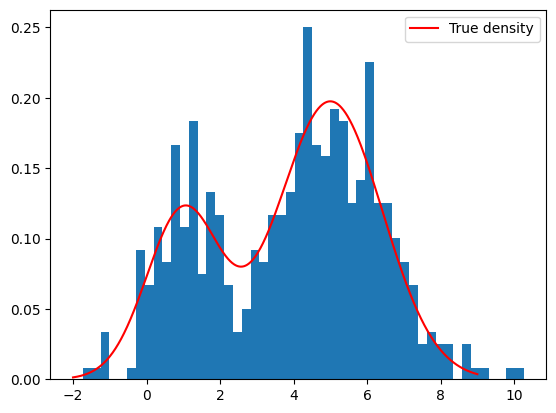

In [6]:
# plot histogram and true density
plt.hist(x, bins=50, density=True)
plt.plot(x_grid, true_density, color='red', label = "True density")
plt.legend()
plt.show()

## c)

In [7]:
def get_gammas(x, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1):
    density_x = get_density(x, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1)
    density1 = np.exp(-0.5 * (x - mu1)**2 / sigmasq1) / np.sqrt(2 * np.pi * sigmasq1)
    return density1 * pi1 / density_x

## d)

In [8]:
def get_mu0(x, gammas):
    return np.sum((1 - gammas) * x) / np.sum(1 - gammas)

def get_mu1(x, gammas):
    return np.sum(gammas * x) / np.sum(gammas)

def get_sigmasq0(x, gammas, mu0):
    return np.sum((1 - gammas) * (x - mu0)**2) / np.sum(1 - gammas)

def get_sigmasq1(x, gammas, mu1):
    return np.sum(gammas * (x - mu1)**2) / np.sum(gammas)

def get_pi0(gammas):
    return np.sum(1 - gammas) / len(gammas)

def get_pi1(gammas):
    return np.sum(gammas) / len(gammas)

## e)

In [9]:
def calculate_log_likelihood(gammas, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1):
    return np.sum(
        (1 - gammas) * np.log(pi0 * np.exp(-0.5 * (x - mu0)**2 / sigmasq0) / np.sqrt(2 * np.pi * sigmasq0)) 
        + gammas * np.log(pi1 * np.exp(-0.5 * (x - mu1)**2 / sigmasq1) / np.sqrt(2 * np.pi * sigmasq1))
        + (1 - gammas) * np.log(pi0) 
        + gammas * np.log(pi1)
    )

In [10]:
def em_algorithm(x, init_pi0, init_pi1, init_mu0, init_mu1, init_sigmasq0, init_sigmasq1, tol=1e-12):
    gammas = get_gammas(x, init_pi0, init_pi1, init_mu0, init_mu1, init_sigmasq0, init_sigmasq1)
    new_pi0 = get_pi0(gammas)
    new_pi1 = get_pi1(gammas)
    new_mu0 = get_mu0(x, gammas)
    new_mu1 = get_mu1(x, gammas)
    new_sigmasq0 = get_sigmasq0(x, gammas, new_mu0)
    new_sigmasq1 = get_sigmasq1(x, gammas, new_mu1)
    log_likelihood = calculate_log_likelihood(gammas, new_pi0, new_pi1, new_mu0, new_mu1, new_sigmasq0, new_sigmasq1)

    
    while True:
        gammas = get_gammas(x, new_pi0, new_pi1, new_mu0, new_mu1, new_sigmasq0, new_sigmasq1)
        new_pi0 = get_pi0(gammas)
        new_pi1 = get_pi1(gammas)
        new_mu0 = get_mu0(x, gammas)
        new_mu1 = get_mu1(x, gammas)
        new_sigmasq0 = get_sigmasq0(x, gammas, new_mu0)
        new_sigmasq1 = get_sigmasq1(x, gammas, new_mu1)
        new_log_likelihood = calculate_log_likelihood(gammas, new_pi0, new_pi1, new_mu0, new_mu1, new_sigmasq0, new_sigmasq1)
        if np.abs(new_log_likelihood - log_likelihood) < tol:
            break
        log_likelihood = new_log_likelihood
    
    return new_pi0, new_pi1, new_mu0, new_mu1, new_sigmasq0, new_sigmasq1
     

In [11]:
init_pi0 = 0.5
init_pi1 = 0.5

init_mu0 = 0
init_mu1 = 1

init_sigmasq0 = 1
init_sigmasq1 = 1

In [12]:
em_pi0, em_pi1, em_mu0, em_mu1, em_sigmasq0, em_sigmasq1 = em_algorithm(x, init_pi0, init_pi1, init_mu0, init_mu1, init_sigmasq0, init_sigmasq1)

In [13]:
em_pi0, em_pi1, em_mu0, em_mu1, em_sigmasq0, em_sigmasq1 

(0.28839624182031465,
 0.7116037581796855,
 0.9696877475276321,
 5.095947885731299,
 0.8033526798899008,
 2.2951200520278108)

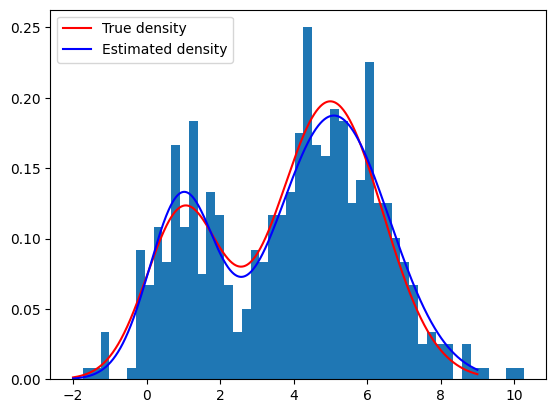

In [14]:
# plot histogram and true density
true_density = get_density(x_grid, pi0, pi1, mu0, mu1, sigmasq0, sigmasq1)
em_density = get_density(x_grid, em_pi0, em_pi1, em_mu0, em_mu1, em_sigmasq0, em_sigmasq1)
plt.hist(x, bins=50, density=True)
plt.plot(x_grid, true_density, color="red", label="True density")
plt.plot(x_grid, em_density, color="blue", label="Estimated density")
plt.legend()
plt.show()